In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check how many females survived
titanic[titanic["Sex"] == "female"].describe()
# 74% of females survived and only 18% of males survived

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,314.000000,314.000000,314.000000,261.000000,314.000000,314.000000,314.000000
mean,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
std,256.846324,0.438211,0.857290,14.110146,1.156520,1.022846,57.997698
min,2.000000,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000
25%,231.750000,0.000000,1.000000,18.000000,0.000000,0.000000,12.071875
50%,414.500000,1.000000,2.000000,27.000000,0.000000,0.000000,23.000000
75%,641.250000,1.000000,3.000000,37.000000,1.000000,1.000000,55.000000
max,889.000000,1.000000,3.000000,63.000000,8.000000,6.000000,512.329200


In [4]:
# Impute the data to fill all the missing values in the Age column
#titanic[np.isnan(titanic['Age'])].describe()

titanic['Age'].fillna(29.699, inplace=True)
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699094,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


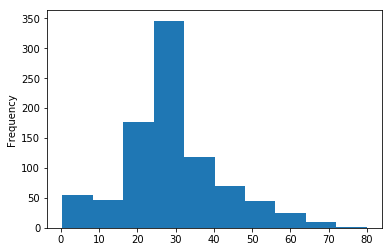

In [18]:
titanic['Age'].plot.hist()

In [6]:
len(titanic['Cabin'].unique())
titanic['Cabin'].fillna('Other', inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Other,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Other,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Other,S


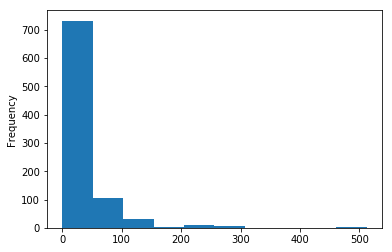

In [27]:
titanic['Fare'].plot.hist()

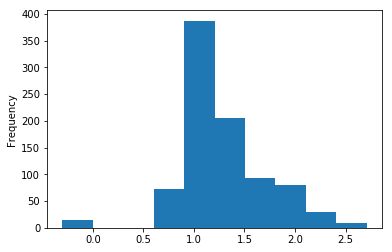

In [7]:
# 'Fare' feature is skewed, so apply a log transformation to convert to a normal distribution
titanic['Fare_log'] = titanic['Fare'].apply(lambda x: np.log10(x+0.5))
titanic['Fare_log'].plot.hist()

In [8]:
# dummify 3 columns
dataset = titanic[['Pclass', 'Age', 'SibSp', 'Sex', 'Cabin', 'Fare_log', 'Embarked', 'Survived']]
dataset = pd.get_dummies(dataset, columns=["Sex","Embarked", "Cabin"])

# Modeling

In [9]:
# titanic.head()
train, test = train_test_split(dataset, test_size=0.25)
train_x = train.drop('Survived', axis=1)
train_x.head()

,Pclass,Age,SibSp,Fare_log,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_A10,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_Other,Cabin_T
388,3,29.699,0,0.915358,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
847,3,35.000,0,0.924062,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
860,3,41.000,2,1.164600,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
512,1,36.000,0,1.427932,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
772,2,57.000,0,1.041393,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
def train_rf(x_train, y_train):
    # Fit a random forest model on the training
    clf = RandomForestClassifier(class_weight='balanced')
    param_grid = {
        "max_depth": [5, 8],
        "min_samples_split": [3, 8],
        "min_samples_leaf": [1, 3, 7],
        "bootstrap": [True, False],
        "criterion": ["gini", "entropy"],
        "n_estimators": [100, 500]
    }
    grid_search = GridSearchCV(clf, param_grid=param_grid)
    grid_search.fit(x_train, y_train)
#     print "Important features: " + str(clf.feature_importances_)
    return grid_search


In [25]:
def test_rf(classifier, x_valid, y_valid):
    # Use the trained model to predict on the validation set and calculate the ROC curve
    p_labels = classifier.predict(x_valid)
    roc = roc_auc_score(y_valid, p_labels)
    print "ROC: " + str(roc)
    curve = roc_curve(y_valid, p_labels)
    print "Curve: " + str(curve)
    cm = confusion_matrix(y_valid, p_labels)
    print "CM: " + str(cm)
    

In [26]:
clf = train_rf(train_x.as_matrix(), train['Survived'].as_matrix())

In [28]:
test_rf(clf, test.drop('Survived', axis=1).as_matrix(), test['Survived'].as_matrix())

ROC: 0.797750770905
Curve: (array([ 0.        ,  0.13422819,  1.        ]), array([ 0.        ,  0.72972973,  1.        ]), array([2, 1, 0]))
CM: [[129  20]
 [ 20  54]]
